In [1]:
# The data taken from;
# REPUBLIC OF TURKEY PRIME MINISTRY - Disaster & Emergency Management Authority Presidential of Earthquake Department 
# (https://deprem.afad.gov.tr/)

# The data contains 4.0 - 10 (max = 7.9) magnitudes in Turkey coordinates (latitude = between 36 - 42 ,longitude = between 26 - 45)
# The data;
#     starts: Declaration of the Republic of Turkey - 29/10/1923,
#     ends: 20/06/2020
# There are  5878.0 index, 15 columns.


# The purpose of this project, learn to data manipulation.
# Numpy, Pandas, Matplotlib, Seaborn, Geocoder are used.
# http://kepler.gl/ used for mapping.

###########################################################

# Process:

# Read data
# Organize columns and index
# Slicing data according to mangitudes of earthquakes
# Describe of earthquakes
# Visualization of earthquakes
# Find location (place/city) from latitude and longtitude
# Re-organize data (clean out of Turkey's place, change Turkish characters )
# Find and visualize largest earthquakes in Turkey.


# Issues:
#       - Some place's names are not city.
#       - Geocoder is not working fast.
#       - Selecting of columns give error (not important / doesnt effect to system) when using Geocoder.

# In Next Update try to:
#                      - fix Issues
#                      - add region of earthquakes
#                      - add new relations 
#                      - add new style visualizing

###########################################################

# It is my first data manipulation process. I will doing this kind of analysis
# and updating it regularly. I am open to suggestions and criticism. 
# I may have mistakes. Thank you.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
earthquake = pd.read_csv('../input/catalogue.csv',encoding = 'ISO-8859-1') 
df = earthquake.copy()                                                               
df.head()

,No,Zaman (UTC),Ref1,Kaynak Aç?klama 1,Enlem,Boylam,Derinlik,Sabit Derinlik,Kaynak No 2,Kaynak Aç?klama 2,Tip,Büyüklük,Kaynak No 3,Kaynak Aç?klama 3,Yer
0,0,2020-01-28 20:10:26,0,,39.0131,27.8700,5.08,-,7,AFAD-DDA,Mw,4.7,7,AFAD-DDA,-
1,0,2020-01-28 14:53:51,0,,39.0831,27.8295,7.00,-,7,AFAD-DDA,Mw,4.1,7,AFAD-DDA,-
2,0,2020-01-28 11:26:14,0,,39.1001,27.8411,6.98,-,7,AFAD-DDA,Mw,4.8,7,AFAD-DDA,-
3,0,2020-01-27 16:12:00,0,,38.3950,39.1333,11.94,-,7,AFAD-DDA,Mw,4.2,7,AFAD-DDA,-
4,0,2020-01-26 10:12:17,0,,38.4111,39.1530,12.25,-,7,AFAD-DDA,Mw,4.1,7,AFAD-DDA,-


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 5878 non-null   int64  
 1   Zaman (UTC)        5878 non-null   object 
 2   Ref1               5878 non-null   int64  
 3   Kaynak Aç?klama 1  5878 non-null   object 
 4   Enlem              5878 non-null   float64
 5   Boylam             5878 non-null   float64
 6   Derinlik           5878 non-null   float64
 7   Sabit Derinlik     5878 non-null   object 
 8   Kaynak No 2        5878 non-null   int64  
 9   Kaynak Aç?klama 2  5878 non-null   object 
 10  Tip                5878 non-null   object 
 11  Büyüklük           5878 non-null   float64
 12  Kaynak No 3        5878 non-null   int64  
 13  Kaynak Aç?klama 3  5878 non-null   object 
 14  Yer                5878 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 689.0+ KB


* **There are 15 columns**
* **Object -- 7**
* **int64 - float64 -- 8**

We need to change column names to English. Because some keys aren't compatible for all systems.

In [5]:
df.rename(columns={'No' : 'number',
                   'Zaman (UTC)' : 'times',
                   'Ref1' : 'reference 1',
                   'Kaynak Aç?klama 1' : 'source description 1',
                   'Enlem' : 'latitude',
                   'Boylam' : 'longitude',
                   'Derinlik' : 'depth',
                   'Sabit Derinlik' : 'fixed depth',
                   'Kaynak No 2' : 'source no 2',
                   'Kaynak Aç?klama 2' : 'source description',
                   'Tip' : 'type',
                   'Büyüklük' : 'magnitude',
                   'Kaynak No 3' : 'source no 3',
                   'Kaynak Aç?klama 3' : 'source description 3',
                   'Yer' : 'place'}, inplace = True)

* Reference 1, Source Description 1-3, Fixed Depth, Source No 2, Source No 3 are not important for us. We need to remove that columns.
* There is no any information about place. We will find place name according to Latitude and Longitude.

In [6]:
df = df.drop(['reference 1', 'source description 1','source description', 'fixed depth',
              'source no 2','source no 3', 'source description 3','place'], axis = 1)

* We need to seperate date - time
* Date should be in index

In [7]:
df['date'] = pd.to_datetime(df['times']).dt.date
df['time'] = pd.to_datetime(df['times']).dt.time
df = df.drop(['times'], axis = 1)
df = df[['number', 'date', 'time', 'latitude', 'longitude', 'depth', 'magnitude', 'type']]
df = df.set_index('date')

In [8]:
df[['depth','magnitude']].describe().T

,count,mean,std,min,25%,50%,75%,max
depth,5878.0,25.086647,28.058043,0.0,10.0,13.665,33.0,212.0
magnitude,5878.0,4.438142,0.464362,4.0,4.1,4.300,4.6,7.9


* There are 5878 observations in dataset.
* The biggest Magnitude is 7.9
* The biggest Depth is 212
* The mean of Magnitude is 4.438142
* The mean of Depth is 25.086647

Let's examine; 
- the correlation of magnitude and depth,

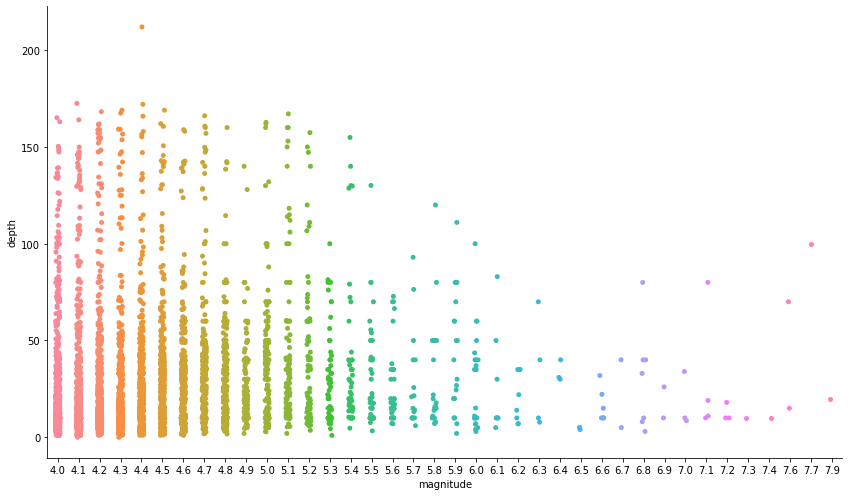

In [9]:
sns.catplot(x = 'magnitude', y = 'depth', data = df, aspect = 1.7, height = 7);

- distribution by years.

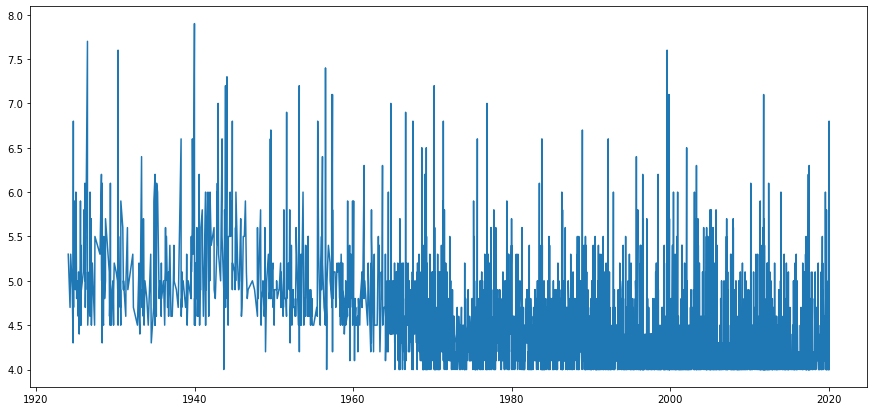

In [10]:
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(df.index, df['magnitude']);

### Information about Types of Earthquakes:
* Magnitude = 5.0 - 5.9 --> Moderate
* Magnitude = 6.0 - 6.9 --> Strong
* Magnitude = 7.0 - 7.9 --> Major
* Magnitude >=      8.0 --> Great

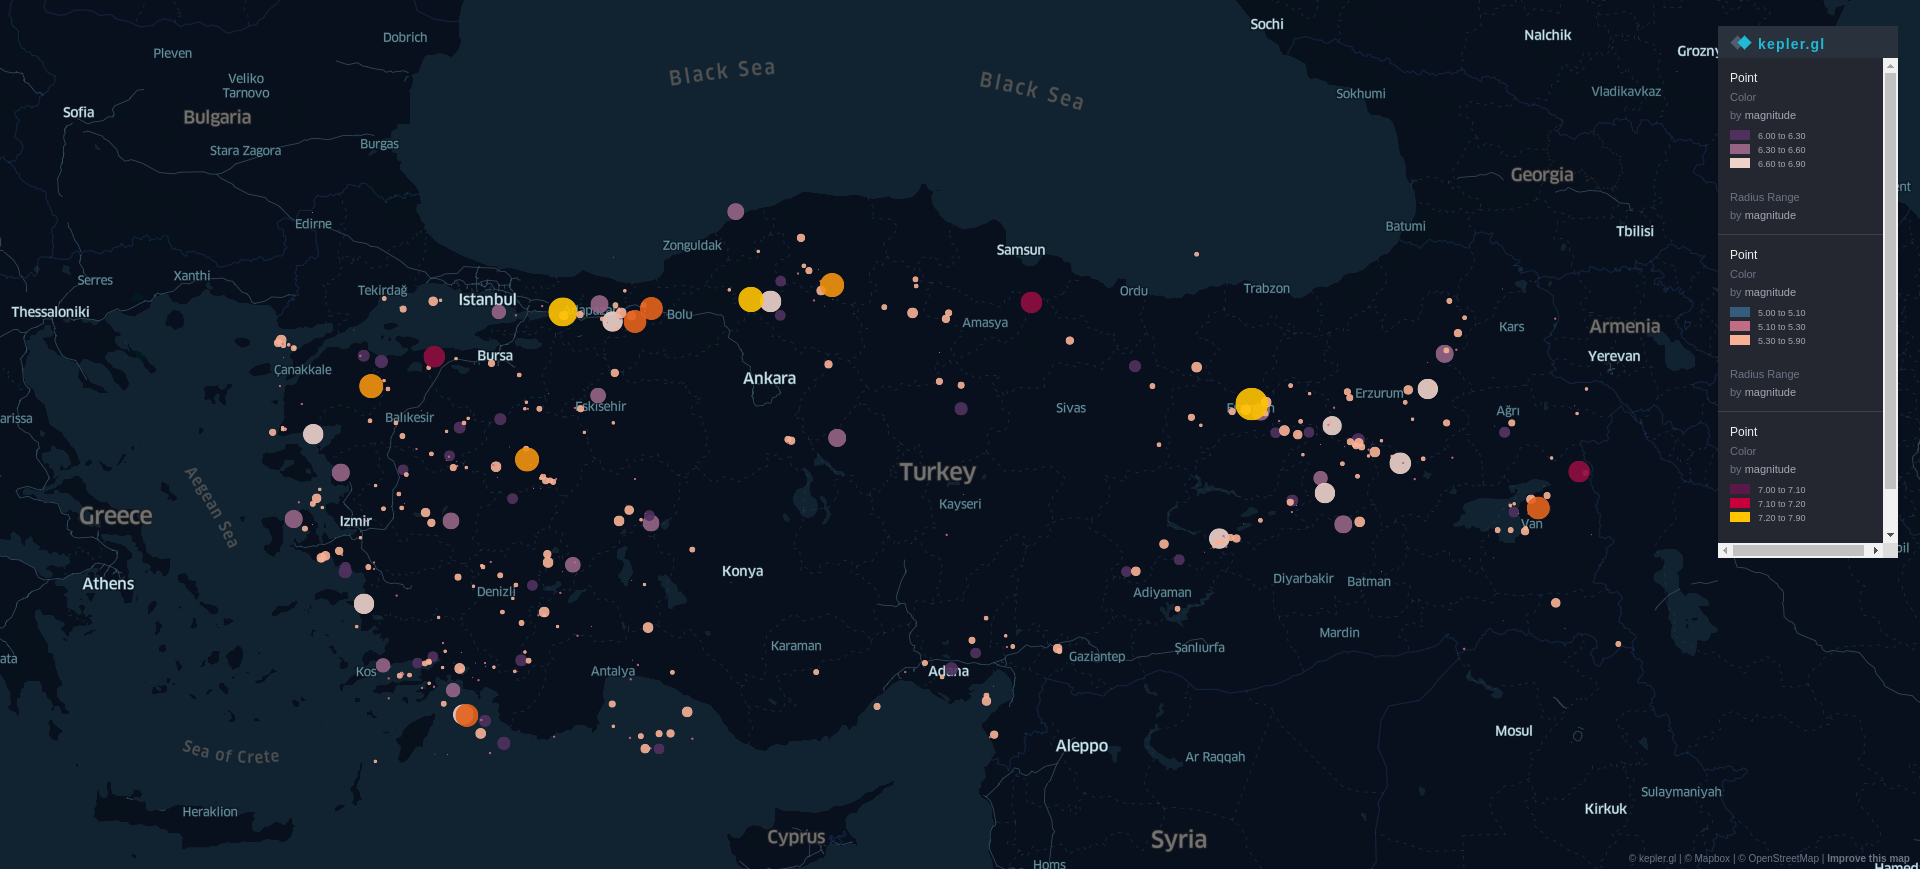

In [11]:
df_moderate = df[(df.magnitude >= 5.0) & (df.magnitude <= 5.9)]
df_strong = df[(df.magnitude >= 6.0) & (df.magnitude <= 6.9)]
df_major = df[(df.magnitude >= 7.0) & (df.magnitude <= 7.9)]
# There is no any great earthquakes in Turkey.

* Create function to find location of eartquakes according to latitude and longtitude.

# **Note:**

* Geocoder is not working on Kaggle (works in other notebooks like Jupyter).
* Gives GeocoderServiceError.
* At this point I create new csv file (location finded) from my local system and read again.

In [12]:
#def findLocations(x): 
#    from geopy.geocoders import Nominatim
#    from geopy.point import Point
#    from geopy.exc import GeocoderTimedOut
#    for i in range(0, len(x)):
#        geolocator = Nominatim(user_agent="googlev3")
#        location = geolocator.reverse(Point((x.latitude[i], x.longitude[i])), timeout = 10)
#        try:
#            x['place'][i] = location._raw['address']['city']
#        except KeyError:
#            pass
#        try: 
#           x['place'][i] = location._raw['address']['state']
#       except KeyError:
#            pass
#        try:
#            x['place'][i] = location._raw['address']['province']
#        except KeyError:
#            pass

In [13]:
# findLocations(df_moderate)
# findLocations(df_strong)
# findLocations(df_major)

In [14]:
# df_moderate['place'].unique()
# array(['Elazığ', 'Manisa', 'Balıkesir', 'İstanbul', 'Denizli',
#        'Çanakkale', 'Adıyaman', 'Muğla', 'Kırşehir', 'Bingöl', 'Malatya',
#        'Adana', 'Kahramanmaraş', 'Şırnak', 'Tekirdağ', 'Kütahya', 'Muş',
#        'Van', 'Hakkari', 'Erzincan', 'Aydın', 'Kayseri', 'Şanlıurfa',
#        'Ankara', 'Burdur', 'Isparta', 'Ağrı', 'Bursa', 'İzmir', 'Iğdır',
#        'Erzurum', 'Edirne', 'Antalya', 'Osmaniye', 'Sakarya', 'Bolu',
#        'Düzce', 'Kocaeli', 'Yalova', 'Sivas', 'Hatay', 'Çorum', 'Amasya',
#        'Tunceli', 'Batman', 'Ardahan', 'Kars', 'Diyarbakır', 'Gaziantep',
#        'Gümüşhane', 'Çankırı', 'Uşak', 'Mersin', 'Kastamonu', 'Bitlis',
#        'Giresun', 'Kilis', 'Karabük', 'Konya', 'Bartın', 'Mardin',
#        'Yozgat', 'Tokat', 'Satılmışoğlu Mahallesi', 'Bilecik',
#        'Kırıkkale', 'Afyonkarahisar'], dtype=object)

In [15]:
# df_strong['place'].unique()
# array(['Elazığ', 'Denizli', 'Muğla', 'Αποκεντρωμένη Διοίκηση Αιγαίου',
#        'Erzurum', 'Van', 'Bingöl', 'Tunceli', 'Çankırı', 'Adana', 'İzmir',
#        'Erzincan', 'Լոռու մարզ', 'Malatya', 'Kars', 'Çanakkale',
#        'Diyarbakır', 'Manisa', 'Balıkesir', 'Bartın', 'Sakarya', 'Muş',
#        'Adıyaman', 'İstanbul', 'Kozkayı Mahallesi', 'Aydın', 'Karabük',
#        'Uşak', 'Ağrı', 'Yozgat', 'Kırşehir', 'Sivas', 'Bursa',
#        'Շիրակի մարզ', 'Burdur', 'სამცხე-ჯავახეთი'], dtype=object) 

In [16]:
# df_major['place'].unique()
# array(['Van', 'Düzce', 'Kocaeli', 'Kütahya', 'Bursa', 'Muğla',
#        'Αποκεντρωμένη Διοίκηση Αιγαίου', 'Çanakkale', 'Karabük',
#        'Çankırı', 'Tokat', 'Erzincan', 'استان آذربایجان غربی'],dtype=object)

There are a few problems: 

- there are Turkish characters in place
- some cities are not in Turkey.Coordinates are belonging to Turkey but place is not (like Greek Islands).



Let's create function to change characters and remove city.

In [17]:
#def changechar(q):
#    q['place'] = q['place'].replace({'ı':'i',
#                                     'ö':'o',
#                                     'ü':'u',
#                                     'ğ':'g',
#                                     'ç':'c',
#                                     'ş':'s',
#                                     'İ':'I',
#                                     'Ö':'O',
#                                     'Ü':'U',
#                                      Ğ':'G',
#                                     'Ç':'C',
#                                     'Ş':'S'}, regex = True)

In [18]:
#changechar(df_moderate)
#changechar(df_strong)
#changechar(df_major)

In [19]:
# df_moderate = df_moderate[~df_moderate['place'].isin(['Αποκεντρωμένη Διοίκηση Αιγαίου',
#                                                       'محافظة دير الزور',
#                                                       'پارێزگای هەولێر',
#                                                       'აჭარის ავტონომიური რესპუბლიკა',
#                                                       'Αλεξανδρούπολη',
#                                                       'استان آذربایجان غربی',
#                                                       'ქვემო ქართლი',
#                                                       'Շիրակի մարզ',
#                                                       'Լոռու մարզ',
#                                                       'გურია',
#                                                       'სამცხე-ჯავახეთი',
#                                                       'پارێزگای دھۆک',
#                                                       'იმერეთი',
#                                                       'محافظة نینوى'])]


# df_strong = df_strong[~df_strong['place'].isin(['Αποκεντρωμένη Διοίκηση Αιγαίου',
#                                                 'Շիրակի մարզ',
#                                                 'სამცხე-ჯავახეთი',
#                                                 'Լոռու մարզ'])]


# df_major = df_major[~df_major['place'].isin(['Αποκεντρωμένη Διοίκηση Αιγαίου',
#                                              'استان آذربایجان غربی'])]

In [20]:
moderate = pd.read_csv('../input/moderate.csv',encoding = 'ISO-8859-1') 
strong = pd.read_csv('../input/strong.csv',encoding = 'ISO-8859-1')
major = pd.read_csv('../input/major.csv',encoding = 'ISO-8859-1')
df_moderate = moderate.copy()  
df_strong = strong.copy()
df_major = major.copy()

In [21]:
df_moderate['place'].unique()

array(['Elazig', 'Manisa', 'Balikesir', 'Istanbul', 'Denizli',
       'Canakkale', 'Adiyaman', 'Mugla', 'Kirsehir', 'Bingol', 'Malatya',
       'Adana', 'Kahramanmaras', 'Sirnak', 'Tekirdag', 'Kutahya', 'Mus',
       'Van', 'Hakkari', 'Erzincan', 'Aydin', 'Kayseri', 'Sanliurfa',
       'Ankara', 'Burdur', 'Isparta', 'Agri', 'Bursa', 'Izmir', 'Igdir',
       'Erzurum', 'Edirne', 'Antalya', 'Osmaniye', 'Sakarya', 'Bolu',
       'Duzce', 'Kocaeli', 'Yalova', 'Sivas', 'Hatay', 'Corum', 'Amasya',
       'Tunceli', 'Batman', 'Ardahan', 'Kars', 'Diyarbakir', 'Gaziantep',
       'Gumushane', 'Cankiri', 'Usak', 'Mersin', 'Kastamonu', 'Bitlis',
       'Giresun', 'Kilis', 'Karabuk', 'Konya', 'Bartin', 'Mardin',
       'Yozgat', 'Tokat', 'Satilmisoglu Mahallesi', 'Bilecik',
       'Kirikkale', 'Afyonkarahisar'], dtype=object)

Solved characters promblems.


It would be better for us to sort from big to small of magnitudes.

In [22]:
import numpy as np
df_moderate = df_moderate.nlargest(len(df_moderate), ['magnitude'])
df_strong = df_strong.nlargest(len(df_strong), ['magnitude'])
df_major = df_major.nlargest(len(df_major), ['magnitude'])

 ### General Informations about Moderate:

In [23]:
df_moderate.groupby('place')['magnitude'].describe()[['count','mean','max']]

,count,mean,max
place,,,
Adana,8.0,5.250000,5.6
Adiyaman,4.0,5.150000,5.5
Afyonkarahisar,1.0,5.200000,5.2
Agri,9.0,5.144444,5.6
Amasya,1.0,5.600000,5.6
...,...,...,...
Tunceli,3.0,5.633333,5.9
Usak,3.0,5.066667,5.1
Van,25.0,5.240000,5.8


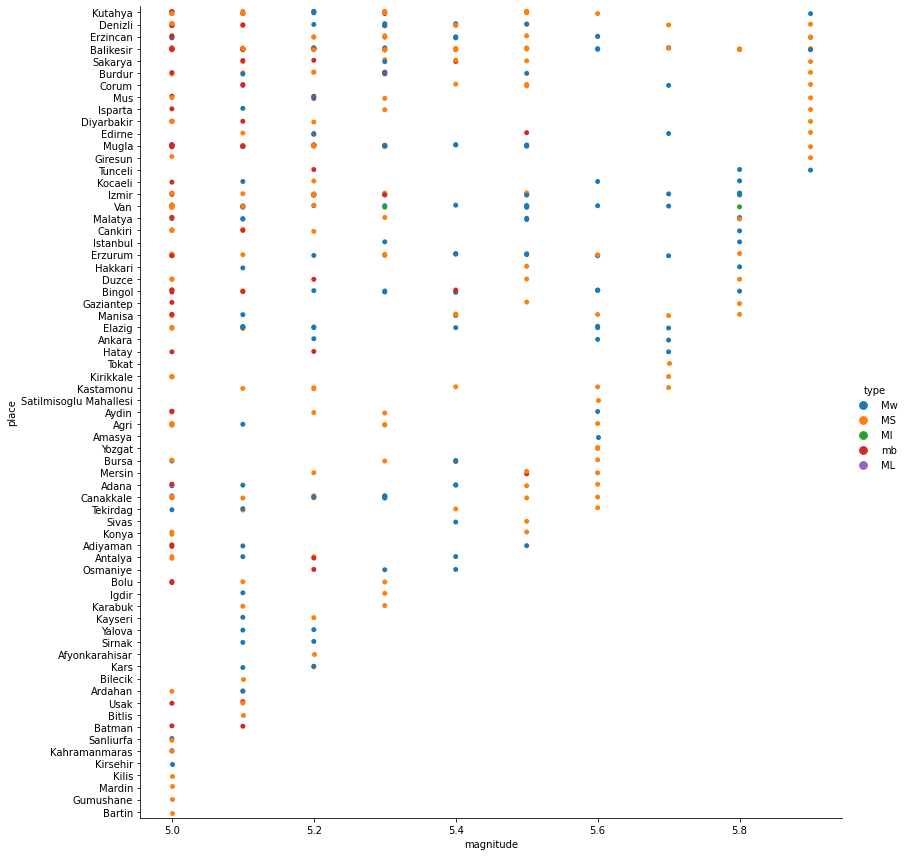

In [24]:
sns.catplot(x = 'magnitude', y = 'place',hue = 'type', data = df_moderate, height = 12);

 ### General Informations about Strong:

In [25]:
df_strong.groupby('place')['magnitude'].describe()[['count','mean','max']]

,count,mean,max
place,,,
Adana,2.0,6.100000,6.2
Adiyaman,1.0,6.000000,6.0
Agri,2.0,6.000000,6.0
Aydin,1.0,6.800000,6.8
Balikesir,4.0,6.075000,6.2
Bartin,1.0,6.500000,6.5
Bingol,4.0,6.325000,6.8
Burdur,1.0,6.100000,6.1
Bursa,1.0,6.100000,6.1


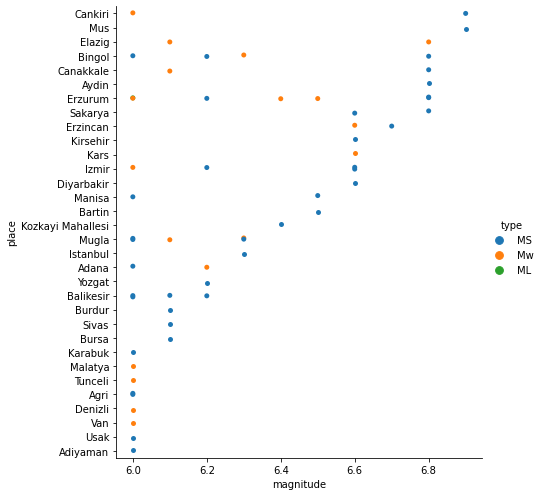

In [26]:
sns.catplot(x = 'magnitude', y = 'place',hue = 'type', data = df_strong, height = 7);

 ### General Informations about Major:

In [27]:
df_major.groupby('place')['magnitude'].describe()[['count','mean','max']]

,count,mean,max
place,,,
Bursa,1.0,7.00,7.0
Canakkale,1.0,7.20,7.2
Cankiri,1.0,7.20,7.2
Duzce,2.0,7.10,7.1
Erzincan,1.0,7.90,7.9
Karabuk,1.0,7.30,7.3
Kocaeli,1.0,7.60,7.6
Kutahya,1.0,7.20,7.2
Mugla,1.0,7.10,7.1


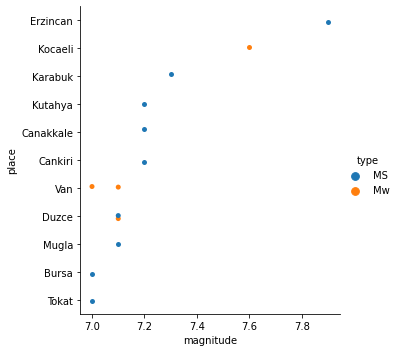

In [28]:
sns.catplot(x = 'magnitude', y = 'place',hue = 'type', data = df_major);

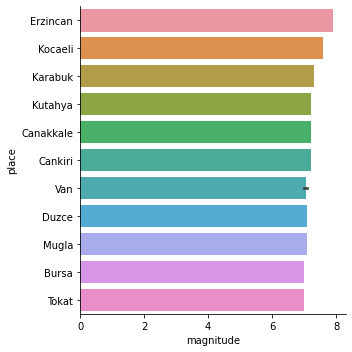

In [29]:
sns.catplot(x = 'magnitude', y = 'place', data = df_major, kind = 'bar');

In [30]:
# The biggest earthquake in Turkey.
df_major[df_major["magnitude"].max() == df_major["magnitude"]]

,date,number,time,latitude,longitude,depth,magnitude,type,place
12,1939-12-26,1116,23:57:21,39.8,39.51,20.0,7.9,MS,Erzincan


In [31]:
# df_moderate.to_csv("final_moderate.csv")
# df_strong.to_csv("final_strong.csv")
# df_major.to_csv("final_major.csv")
# df.to_csv("finalv1.csv")